In [2]:
from methods import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import feature_extraction
from PIL import Image
import skimage

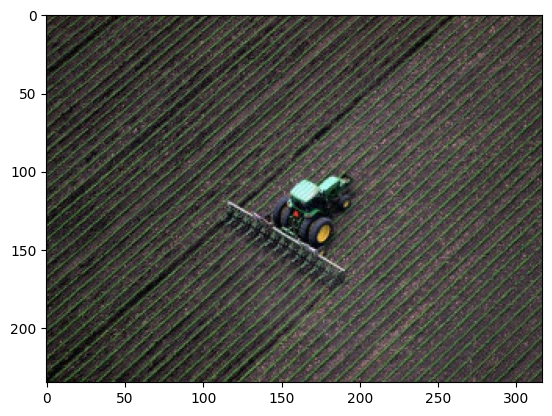

In [3]:
img = Image.open('data/field.png')
plt.imshow(img)
field = img.convert('L')
img.close()
field = skimage.img_as_float(field)
field = skimage.measure.block_reduce(field, (3, 3), np.mean)
patches = feature_extraction.image.extract_patches_2d(field, (5,5))
patches = np.reshape(patches, (-1,25))

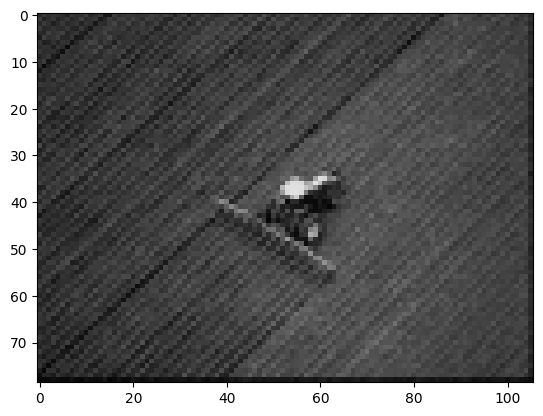

In [4]:
plt.imshow(field, cmap='gray', vmin=0, vmax=1)

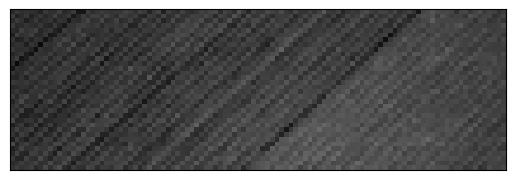

In [5]:
sub_image = field[:34,:field.shape[1] - 1]
plt.imshow(sub_image, cmap='gray', vmin=0, vmax=1)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False, # labels along the bottom edge are off
    left=False,
    right=False,
    labelleft=False
)

[==========          ] 50%
Manifolds...
Manifold #1 [1 4]
Manifold #2 [2 3]


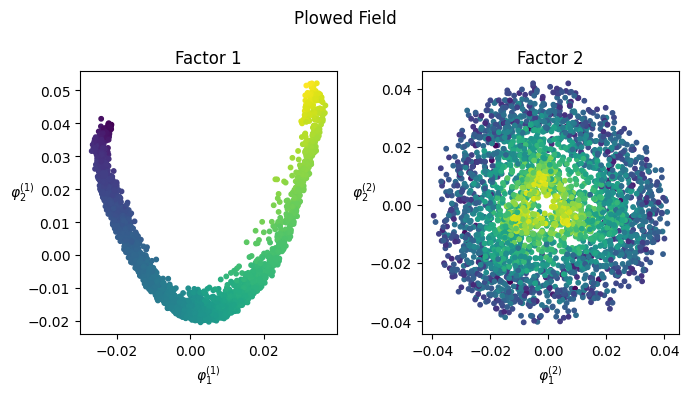

In [6]:
patches = feature_extraction.image.extract_patches_2d(sub_image, (5,5))
patches = np.reshape(patches, (-1,25))
fact = factorize(patches, sigma=0.1, n_factors = 2, sim_crit=0.6, eig_crit=7, n_eigenvectors=20)
plot, axes = plt.subplots(1,2, figsize = (7,4))
axes[0].scatter(fact["phi"][:,fact["manifolds"][0][0]], fact["phi"][:,fact["manifolds"][0][1]], c = np.mean(patches, axis=1), s=10)
axes[1].scatter(fact["phi"][:,fact["manifolds"][1][0]], fact["phi"][:,fact["manifolds"][1][1]], c = np.mean(patches, axis=1), s=10)
axes[0].set_title('Factor 1')
axes[1].set_title('Factor 2')
plot.suptitle('Plowed Field')
axes[0].set_xlabel(r'$\varphi_1^{(1)}$', rotation=0)
axes[0].set_ylabel(r'$\varphi_2^{(1)}$', rotation=0)
axes[1].set_xlabel(r'$\varphi_1^{(2)}$', rotation=0)
axes[1].set_ylabel(r'$\varphi_2^{(2)}$', rotation=0)
plot.tight_layout()

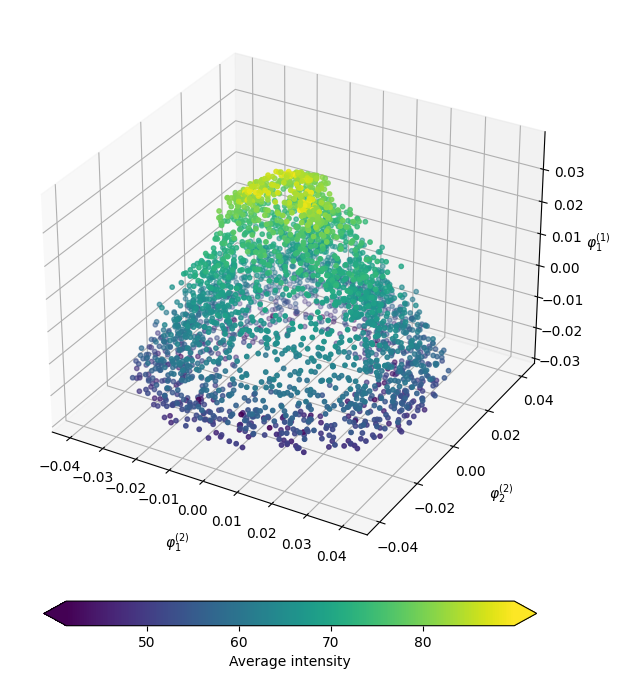

In [7]:
fig = plt.figure(figsize=(8, 8))
data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
        get_from_dict(fact, "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")
ax = fig.add_subplot(projection='3d')
scplt = ax.scatter(phi[:,manifolds[1][0]], phi[:,manifolds[1][1]], phi[:,manifolds[0][0]],
           c = np.mean(data, axis=1)*255, s=10)
fig.colorbar(scplt, fraction=0.04,
             extend="both", pad=0.05,
             location="bottom",
             orientation="horizontal",
             label="Average intensity")
ax.set_xlabel(r'$\varphi_1^{(2)}$', labelpad=10, rotation=0)
ax.set_ylabel(r'$\varphi_2^{(2)}$', labelpad=10, rotation=0)
ax.set_zlabel(r'$\varphi_1^{(1)}$', labelpad=5, rotation=0)
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False) 

In [8]:
import glob
imgs = np.array([np.ndarray.flatten(
    skimage.measure.block_reduce(
    skimage.img_as_float(Image.open(img).convert('L')), (7, 7), np.mean))
    for img in glob.glob('data/PuppetsData/s1*')])

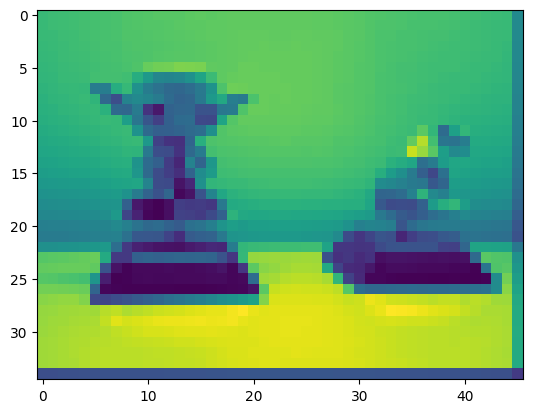

In [9]:
plt.imshow(skimage.measure.block_reduce(
    skimage.img_as_float(Image.open('data/PuppetsData/s1_100001.jpg').convert('L')), (7, 7), np.mean))

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pcs = pca.fit_transform(imgs)

In [11]:
puppets_fact = factorize(imgs, sigma=0.4, n_factors = 2, sim_crit=0.6, eig_crit=1.0, n_eigenvectors=20)

[==========          ] 50%
Manifolds...
Manifold #1 [1 2 3 4]
Manifold #2 [ 5  8 15]


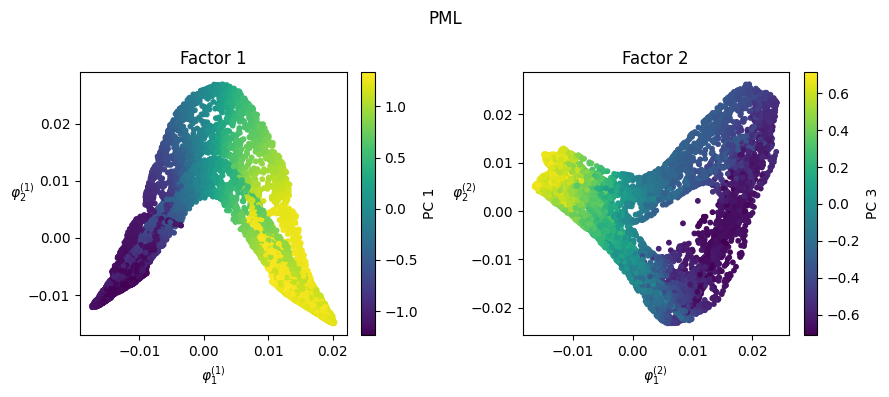

In [12]:
plot, axes = plt.subplots(1,2, figsize = (9,4))
f1 = axes[0].scatter(puppets_fact["phi"][:,puppets_fact["manifolds"][0][0]], puppets_fact["phi"][:,puppets_fact["manifolds"][0][1]], c = pcs[:,0], s=10)
f2 = axes[1].scatter(puppets_fact["phi"][:,puppets_fact["manifolds"][1][0]], puppets_fact["phi"][:,puppets_fact["manifolds"][1][1]], c = pcs[:,2], s=10)
axes[0].set_title('Factor 1')
axes[1].set_title('Factor 2')
plot.suptitle('PML')
plot.colorbar(f1, ax = axes[0], fraction=0.05, label = 'PC 1')
plot.colorbar(f2, ax = axes[1], fraction=0.05, label = 'PC 3')
axes[0].set_xlabel(r'$\varphi_1^{(1)}$', rotation=0)
axes[0].set_ylabel(r'$\varphi_2^{(1)}$', rotation=0)
axes[1].set_xlabel(r'$\varphi_1^{(2)}$', rotation=0)
axes[1].set_ylabel(r'$\varphi_2^{(2)}$', rotation=0)
plot.tight_layout()
plot.tight_layout()

In [13]:
puppets_ind_fact = ic_pml(imgs, zeta = 0.01, sigma=0.4,
                                        dim = 2, sim_crit=0.6, eig_crit=1.0,
                                        n_eigenvectors=20)

  0%|          | 0/8 [00:00<?, ?it/s]

[==========          ] 50%
Manifolds...
Manifold #1 [1 2 3 4]
Manifold #2 [5 8]
[[1, 3, 2], [5, 8]]


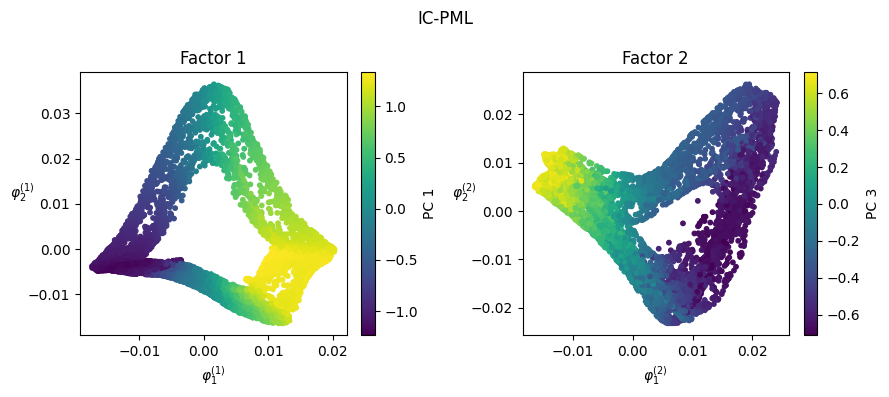

In [14]:
(pup_ind_fact, new_manifolds, puppets_ind_coords) = puppets_ind_fact
plot, axes = plt.subplots(1,2, figsize = (9,4))
f1 = axes[0].scatter(pup_ind_fact["phi"][:,new_manifolds[0][0]],
                pup_ind_fact["phi"][:,new_manifolds[0][1]], c = pcs[:,0], s=10)
f2 = axes[1].scatter(pup_ind_fact["phi"][:,new_manifolds[1][0]],
                pup_ind_fact["phi"][:,new_manifolds[1][1]], c = pcs[:,2], s=10)
axes[0].set_title('Factor 1')
axes[1].set_title('Factor 2')
plot.suptitle('IC-PML')
plot.colorbar(f1, ax = axes[0], fraction=0.05, label = 'PC 1')
plot.colorbar(f2, ax = axes[1], fraction=0.05, label = 'PC 3')
axes[0].set_xlabel(r'$\varphi_1^{(1)}$', rotation=0)
axes[0].set_ylabel(r'$\varphi_2^{(1)}$', rotation=0)
axes[1].set_xlabel(r'$\varphi_1^{(2)}$', rotation=0)
axes[1].set_ylabel(r'$\varphi_2^{(2)}$', rotation=0)
plot.tight_layout()
plot.tight_layout()